In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv('../../datasets/cleaned/Spanish_and_English_Parent_CLEANED.csv')
data.head()

In [180]:
columns = data.columns.values
print(columns)

['Unnamed: 0' 'Respondent ID'
 'What is the grade of the child who brought home this survey?'
 'What is the street intersection nearest your home? (Provide the names of two intersecting streets)'
 'How far does your child live from school?'
 'On most days, how does your child get to school?'
 'On most days, how does your child leave school?'
 'How long does it normally take your child to get to school?'
 'How long does it normally take your child to get home from school?'
 'Has your child asked you for your permission to walk or bike from school?'
 'At what grade would you allow your child to walk or bike to/from school without an adult?'
 'Distance as a concern' 'Convenience of Driving as a concern'
 'Time as a concern' "Child's before/after school activities as a concern"
 'Car speeds along route as a concern'
 'Amount of traffic along route as a concern'
 'Adults to walk/bike with as a concern'
 'Sidewalks or pathways as a concern'
 'Safety of intersections and crossings as a concer

In [181]:
#extract comfortable age
comf_age = [data['At what grade would you allow your child to walk or bike to/from school without an adult?'],
            data.iloc[:,0]]
row_drop = []

for i in range(len(comf_age[0])):
    if not isinstance(comf_age[0][i], float):
        if not comf_age[0][i].isdigit() and comf_age[0][i][0] != '-':
               row_drop.append(comf_age[1][i])
    else:
        row_drop.append(comf_age[1][i])

print(row_drop)

[1, 7, 30, 32, 33, 34, 35, 36, 37, 42, 45, 46, 48, 49, 50, 51, 54, 55, 56, 57, 60, 62, 65, 66, 67, 69, 71, 72, 73, 76, 77, 78, 81, 82, 86, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 107, 110, 111, 113, 114, 116, 118, 121, 122, 123, 124, 127, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142]


In [182]:
data.drop([int(x) for x in row_drop], inplace=True)
print([int(x) for x in row_drop])
    
comf_age = data['At what grade would you allow your child to walk or bike to/from school without an adult?']

[1, 7, 30, 32, 33, 34, 35, 36, 37, 42, 45, 46, 48, 49, 50, 51, 54, 55, 56, 57, 60, 62, 65, 66, 67, 69, 71, 72, 73, 76, 77, 78, 81, 82, 86, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 107, 110, 111, 113, 114, 116, 118, 121, 122, 123, 124, 127, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142]


In [183]:
uncomfortable = []
for grade in comf_age:
    grade = int(grade)
    if grade<0 or grade>=9:
        uncomfortable.append(1)
    else:
        uncomfortable.append(0)
        
print(uncomfortable)

[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


In [229]:
always_uncomfortable = []
for grade in comf_age:
    grade = int(grade)
    if grade<0:
        always_uncomfortable.append(1)
    else:
        always_uncomfortable.append(0)
        
print(always_uncomfortable)

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [193]:
concern_start = 11
concern_end = 22
improve_start = 23
improve_end = 35

concerns = columns[concern_start:concern_end]
improvements = columns[improve_start:improve_end]

def boolean_to_int(bool_list):
    ret = []
    for bool in bool_list:
        if (bool):
            ret.append(1)
        else:
            ret.append(0)
    return ret

    
print(concerns)

['Distance as a concern' 'Convenience of Driving as a concern'
 'Time as a concern' "Child's before/after school activities as a concern"
 'Car speeds along route as a concern'
 'Amount of traffic along route as a concern'
 'Adults to walk/bike with as a concern'
 'Sidewalks or pathways as a concern'
 'Safety of intersections and crossings as a concern'
 'Crossing guards as a concern' 'Violence or crime as a concern']


In [194]:
concern_data = [data[col_name] for col_name in concerns]
concern_data = [boolean_to_int(each_concern) for each_concern in concern_data]

improv_data = [data[col_name] for col_name in improvements]
improv_data = [boolean_to_int(each_improv) for each_improv in improv_data]

print(concern_data[0])

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [198]:
from sklearn import metrics

concern_acc = [metrics.accuracy_score(each_column, uncomfortable) for each_column in concern_data]
improv_acc = [metrics.accuracy_score(each_column, uncomfortable) for each_column in improv_data]

print(concern_acc)

[0.7391304347826086, 0.6666666666666666, 0.6521739130434783, 0.6521739130434783, 0.5507246376811594, 0.5652173913043478, 0.6086956521739131, 0.6086956521739131, 0.5072463768115942, 0.5362318840579711, 0.5362318840579711]


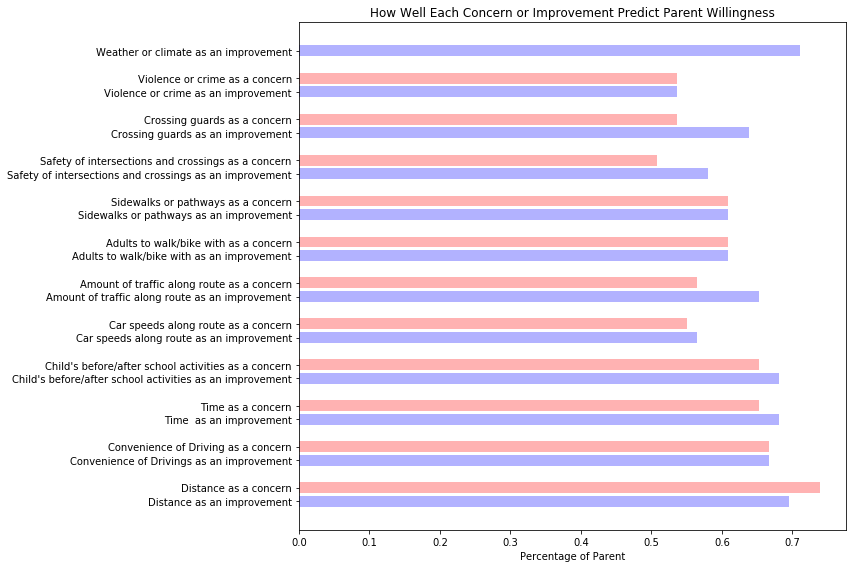

In [251]:
index = [x * 3 for x in np.arange(len(improvements))]
concern_index = [x + 1 for x in index[:len(concerns)]]

fig, ax = plt.subplots()
fig.set_size_inches((12, 8))

improvs_bars = ax.barh(index, improv_acc, color='b', align='center', alpha = .3)
concern_bars = ax.barh(concern_index, concern_acc, color='r', align='center', alpha = .3)

plt.yticks(np.append(index, concern_index), np.append(improvements, concerns))

ax.set_xlabel('Percentage of Parent')
ax.set_title('How Well Each Concern or Improvement Predict Parent Willingness')

fig.tight_layout()
plt.show()

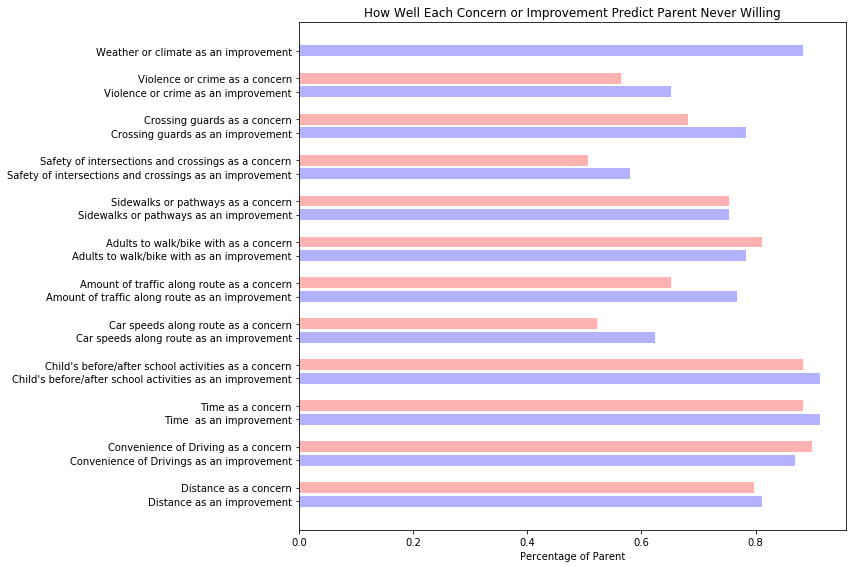

In [250]:
never_comf_concern_acc = [metrics.accuracy_score(each_column, always_uncomfortable) for each_column in concern_data]
never_comf_improv_acc = [metrics.accuracy_score(each_column, always_uncomfortable) for each_column in improv_data]

index = [x * 3 for x in np.arange(len(improvements))]
concern_index = [x + 1 for x in index[:len(concerns)]]

fig, ax = plt.subplots()
fig.set_size_inches((12, 8))

improvs_bars = ax.barh(index, never_comf_improv_acc, color='b', align='center', alpha = .3)
concern_bars = ax.barh(concern_index, never_comf_concern_acc, color='r', align='center', alpha = .3)

plt.yticks(np.append(index, concern_index), np.append(improvements, concerns))

ax.set_xlabel('Percentage of Parent')
ax.set_title('How Well Each Concern or Improvement Predict Parent Never Willing')

fig.tight_layout()
plt.show()